#### Подключение библиотек

In [68]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Загрузка данных

In [69]:
TRAIN_DATASET_PATH = 'input/train.csv'
TEST_DATASET_PATH = 'input/test.csv'

In [70]:
train_data = pd.read_csv(TRAIN_DATASET_PATH)

In [71]:
train_data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [72]:
test_data = pd.read_csv(TEST_DATASET_PATH)

In [73]:
test_data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,B,B,46,7960,6,350.0,3,11,B
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,B,B,53,14892,4,NaN,1,4,B
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [76]:
# Сравнение наборов данных показывает: 
# train - 10 000 записей и 19 признаков (без Id), 
# test - 5 000 записей и 18 признаков (без Id).

#### Изменение типа данных признаков Id и DistrictId на строковые (str)

In [77]:
train_data['Id'] = train_data['Id'].astype(str)
train_data['DistrictId'] = train_data['DistrictId'].astype(str)

#### Определение целевой переменной

In [78]:
train_data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [79]:
target = 'Price'

In [80]:
y = train_data[target]
y.head(5)

0    184966.930730
1    300009.450063
2    220925.908524
3    175616.227217
4    150226.531644
Name: Price, dtype: float64

Text(0.5, 0, 'Цена')

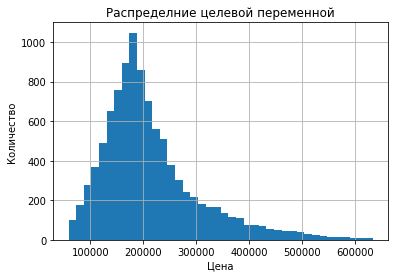

In [81]:
y.hist(bins=40)
plt.title('Распределние целевой переменной')
plt.ylabel('Количество')
plt.xlabel('Цена')


#### Удаление целевой переменной из набора данных train

In [82]:
X = train_data.drop(target, axis=1)
X.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B


#### Обработка признаков

##### Удаляем признак Healthcare_1, т.к. 50% данных отсутвует

In [83]:
X = X.drop('Healthcare_1', axis=1) 

##### Заполним пропуски в признаке LifeSquare разностью между Square и KitchenSquare с учётом 4 кв. м. на санузлы и коридор

In [84]:
gaps = (X['LifeSquare'].isna()) & (-X['Square'].isna()) & (-X['KitchenSquare'].isna())
X.loc[gaps, 'LifeSquare'] = X.loc[gaps, 'Square'] - X.loc[gaps, 'KitchenSquare'] - 4

#### Работа с категориальными признаками

In [85]:
X.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [86]:
X['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [87]:
X['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [88]:
X['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [89]:
new_numbers = {'A': 0, "B": 1}
X['Ecology_2'] = X['Ecology_2'].replace(new_numbers)
X['Ecology_3'] = X['Ecology_3'].replace(new_numbers)
X['Shops_2'] = X['Shops_2'].replace(new_numbers)

#### Обработка выбросов

##### KitchenSquare

In [90]:
X['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
41.0         2
112.0        2
25.0         2
43.0         2
51.0         2
37.0         2
32.0         2
30.0         2
58.0         2
72.0         1
96.0         1
66.0         1
48.0         1
40.0         1
2014.0       1
35.0         1
60.0         1
78.0         1
27.0         1
84.0         1
62.0         1
42.0         1
63.0         1
39.0         1
1970.0       1
36.0         1
75.0         1
26.0         1
21.0         1
29.0         1
23.0         1
73.0         1
123.0        1
31.0         1
53.0         1
54.0         1
Name: KitchenSquare, dtype: int64

In [91]:
X['KitchenSquare'].quantile(.975), X['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [92]:
gap = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > X['KitchenSquare'].quantile(.975))
X.loc[gap, 'KitchenSquare'] = X['KitchenSquare'].median()
X.loc[X['KitchenSquare'] <3, 'KitchenSquare'] = 3

In [93]:
X['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

##### HouseYear

In [94]:
X['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
1499        2020
5701        2020
7076        2020
          ...   
7611        1916
910         1914
5111        1912
2656        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64

In [95]:
X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020

#### Подготовка исходных данных

In [96]:
class DataPrep:
    
    def _init_ (self):
        self.medians = None
        self.kitchen_square_quantile = None
    
    def fit(self, X):
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        
    def transform(self, X):
       
        # KitchenSquare
        gap = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > self.kitchen_square_quantile)                          
        X.loc[gap, 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
       
        # HouseYear
        X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020
       
        # Healthcare_1
        X = X.drop('Healthcare_1', axis=1)
        
        X.fillna(self.medians, inplace=True)
        return X

#### Изменение признаков

In [97]:
class FeatureChanger():
    
    def _init_(self):
        self.new_numbers = None
        
    def fit(self, X, y=None):
        X = X.copy()
        self.new_numbers = {'A': 0, 'B': 1}
        
    def transform(self, X):
        X['Ecology_2'] = X['Ecology_2'].map(self.new_numbers)
        X['Ecology_3'] = X['Ecology_3'].map(self.new_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.new_numbers)
        return X

In [98]:
train_data = pd.read_csv(TRAIN_DATASET_PATH)
test_data = pd.read_csv(TEST_DATASET_PATH)

prep = DataPrep()
prep.fit(train_data)

train_data = prep.transform(train_data)
test_data = prep.transform(test_data)
train_data.shape, test_data.shape

((10000, 19), (5000, 18))

In [99]:
feats_chage = FeatureChanger()
feats_chage.fit(train_data.drop(columns='Price'), train_data['Price'])

train_data = feats_chage.transform(train_data)
test_data = feats_chage.transform(test_data)
train_data.shape, test_data.shape

((10000, 19), (5000, 18))

In [100]:
train_data.isna().sum().sum(), test_data.isna().sum().sum()

(0, 0)

#### Разбиение массива train на массивы train и valid

In [101]:
X = train_data.drop('Price', axis=1) 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=100)

#### Построение и обучение модели

##### Были обучены LinearRegression, DecisionTree, RandomForest. Наилучшие результаты показал RandomForest с параметрами 
##### (max_depth=10, n_estimators=900, random_state=21)

In [102]:
model = RandomForestRegressor(max_depth=10, n_estimators=900, random_state=21)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

#### Оценка модели

In [103]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

r2_score(y_train, y_train_pred), r2_score(y_valid, y_valid_pred)

(0.8487296797448404, 0.7168949248257954)

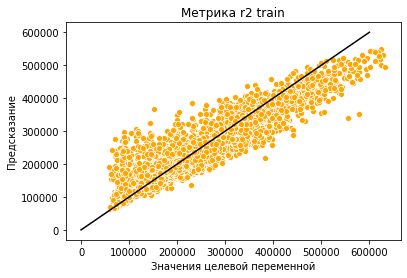

In [104]:
sns.scatterplot(x=y_train, y=y_train_pred, color='orange')
plt.plot([0, 600000], [0, 600000], color='black')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Предсказание')
plt.title('Метрика r2 train')
plt.show()

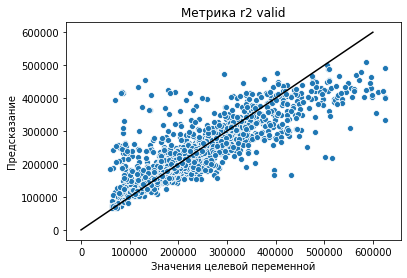

In [105]:
sns.scatterplot(x=y_valid, y=y_valid_pred)
plt.plot([0, 600000], [0, 600000], color='black')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Предсказание')
plt.title('Метрика r2 valid')
plt.show()

#### Предсказние на массиве test

In [106]:
submit = pd.read_csv('input/sample_submission.csv')
submit.head()

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0


In [107]:
final_pred_RF = model.predict(test_data)
final_pred_RF

array([168294.1436323 , 205419.52197496, 188357.44761052, ...,
       330554.79927082, 205939.91715573, 175116.70702567])

In [108]:
submit['Price'] = final_pred_RF
submit.head()

,Id,Price
0,725,168294.143632
1,15856,205419.521975
2,5480,188357.447611
3,15664,345491.253240
4,14275,141506.993251


In [109]:
submit.to_csv('final_pred_RF.csv', index=False)